## 1 Climate Change, Greenhouse Effect

In [4]:
from astropy import constants as cn
from astropy import units as u
import numpy as np

d = 1.50*10**11*(u.m)
F_surf = cn.L_sun/(4*np.pi*d**2)

A = 0.3
power_in = F_surf*(1-A)*np.pi*(cn.R_earth**2)
T_gh = (power_in/(4*np.pi*(cn.R_earth**2)*cn.sigma_sb))**(0.25)

print '    (a)'
print '    The equivalent blackbody temperature of the Earth assuming a planetary albedo is', T_gh

    (a)
    The equivalent blackbody temperature of the Earth assuming a planetary albedo is 254.542807349 K


In [3]:
power_out = 4*np.pi*(cn.R_earth**2)*cn.sigma_sb*T_gh**4.0
T_new = ((power_in + (1-A)*power_out)/(4*np.pi*(cn.R_earth**2)*cn.sigma_sb))**(0.25)

print '    (b)'
print '    The calculated air temperature is', T_new,'.', 'The temperature will be higher by', T_new-T_gh

    (b)
    The calculated air temperature is 290.651828842 K . The temperature will be higher by 36.109021493 K


    (c)
    B(lambda,T) = (2hc^2/(lamda^5)) / (exp(hc/(lambda*kT)) - 1)
    F_surf = pi * integral[(1-a(lambda)) * B(lamda,T) * delta_lambda] from 0 to infinity

    (d)
    The a(lambda) term shows the influence of increased concentration of greenhouse gases since a change in wavelength affects the spectral intensity. The molecule that is the most prominent greenhouse gas is water vapor because as the Earth heats up, more water evaporates causing that water vapor to add to the greenhouse effect. Carbon dioxide is the most problematic.
    
    (e)
    According to the time history of carbon dioxide from 800,000 years, we are in trouble because the increase in CO2 in the atmosphere has spiked exponentially and the peak is much larger than in the past.

## 2 El Nino, ENSO, and Correlations

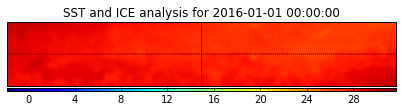

In [45]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
date = datetime(2016,1,1) # date to plot.
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)

#m = Basemap(projection='kav7',lon_0=0,resolution=None)

m = Basemap(llcrnrlon=-150.,llcrnrlat=5.,urcrnrlon=-90.,urcrnrlat=-5.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)

# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

    (b)


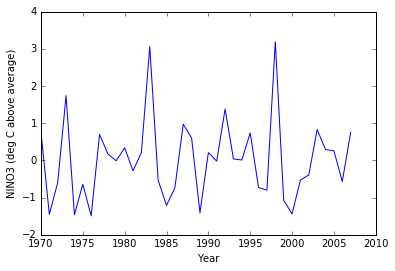

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

year, NINO3 = np.loadtxt('calidata_final.dat', usecols=(0, 4), unpack=True)
print '    (b)'
plt.plot(year, NINO3)
plt.xlabel("Year")
plt.ylabel("NINO3 (deg C above average)")
plt.show()

In [16]:
n = 5
idx = (-NINO3).argsort()[:n]
print '    (c)'
print '    The five largest El Nino events occured during the years:',
print int(year[idx[0]]),',',int(year[idx[1]]),',',int(year[idx[2]]),',',int(year[idx[3]]),', and',int(year[idx[4]])

    (c)
    The five largest El Nino events occured during the years: 1998 , 1983 , 1973 , 1992 , and 1987


In [37]:
temp, precip, snow = np.loadtxt('calidata_final.dat', usecols=(1, 2, 3), unpack=True)
n = 5
idx2 = (-temp).argsort()[:n]
idx3 = (-precip).argsort()[:n]
print '    (d)'
print '    The five extreme temperature events occured during the years:',
print int(year[idx2[0]]),',',int(year[idx2[1]]),',',int(year[idx2[2]]),',',int(year[idx2[3]]),', and',int(year[idx2[4]])
print '    The five extreme precipitation events occured during the years:',
print int(year[idx3[0]]),',',int(year[idx3[1]]),',',int(year[idx3[2]]),',',int(year[idx3[3]]),', and',int(year[idx3[4]])

    (d)
    The five extreme temperature events occured during the years: 1981 , 1996 , 1986 , 1980 , and 2003
    The five extreme precipitation events occured during the years: 1993 , 1998 , 1978 , 1983 , and 1997


    The 5 strongest El Nino events does not look like it relates at all to the extreme events in temperature and only slighty correlates to the extreme events in precipitation

    (e)


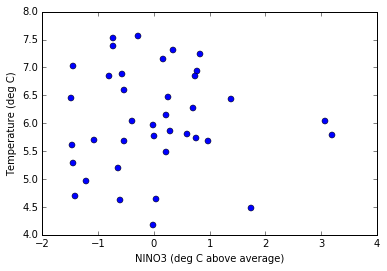

    The calculated correlation coefficient of temperature vs. NINO3 is 0.00511244585807 with a significance of 0.975698103491


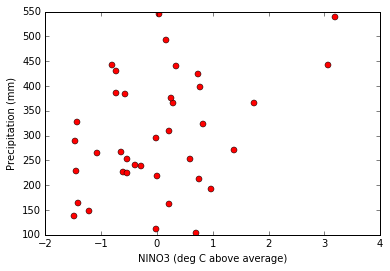

    The calculated correlation coefficient of precipitation vs. NINO3 is 0.37712170126 with a significance of 0.0195960974091


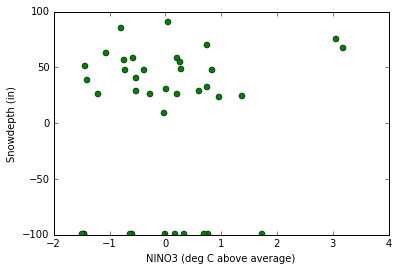

    The calculated correlation coefficient of snowdepth vs. NINO3 is 0.141972307605 with a significance of 0.395180753194


In [40]:
from scipy.stats.stats import pearsonr
print '    (e)'
plt.plot(NINO3, temp, 'bo')
plt.ylabel("Temperature (deg C)")
plt.xlabel("NINO3 (deg C above average)")
plt.show()
p1 = pearsonr(NINO3, temp)
print '    The calculated correlation coefficient of temperature vs. NINO3 is', p1[0], 'with a significance of', p1[1]

plt.plot(NINO3, precip, 'ro')
plt.ylabel("Precipitation (mm)")
plt.xlabel("NINO3 (deg C above average)")
plt.show()
p2 = pearsonr(NINO3, precip)
print '    The calculated correlation coefficient of precipitation vs. NINO3 is', p2[0], 'with a significance of', p2[1]

plt.plot(NINO3, snow, 'go')
plt.ylabel("Snowdepth (in)")
plt.xlabel("NINO3 (deg C above average)")
plt.show()
p3 = pearsonr(NINO3, snow)
print '    The calculated correlation coefficient of snowdepth vs. NINO3 is', p3[0], 'with a significance of', p3[1]

    The results suggest that ENSO has a good influence on precipitation and no influence on temperature in California. Snow and precipitation are not equaly strongly (anti)correlated with NINO3. The results are consistent with the maps of impacts provided since it is wetter but not necessarily hotter. 

    (f)
    The graphics shows the hot region of the sea surface temperature moving upward and more to the left. It also seems like the hot region on the right is splitting into two as time progresses. I think we are currently in a neutral event since the heat is moving away from North America.